# Sprint 5

## Problem 1, 2, 3 and 4

In [30]:
import numpy as np
from numpy.random import *
import random

In [109]:
class ScratchSVMClassifier():

    def __init__(self, num_iter, lr, bias, Threshold): 
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.Threshold = Threshold
           
    def _SVC_hypothesis(self, X, y):
        y = y.reshape(-1,1)

        for i in range(y.shape[0]):
            temp = 0
            for j in range(len(y)):
                temp += self.lambda_[j] * y[i] * y[j] * np.dot(X[i].T, X[j])
            self.lambda_[i] += self.lr * (1 - temp)
            self.lambda_[self.lambda_ <= 0] = 0
        return self.lambda_
    
    def fit(self, X, y, X_val=None, y_val=None):
        np.random.seed(0)
        self.lambda_ = np.random.rand(X.shape[0], 1) * 0.03
        
        for i in range(self.iter):
            self._SVC_hypothesis(X, y)
        
        self.index_l = []
        for j, i in enumerate(self.lambda_):
            if i > self.Threshold:
                self.index_l .append(j)
        self.lambda_sv = self.lambda_[self.index_l]
        self.X_sv = X[self.index_l]
        self.y_sv = y[self.index_l]
    
    def predict(self, X):
        self.y_pred = 0
        for i in range(self.lambda_sv.shape[0]):
             self.y_pred += self.lambda_sv[i] * self.y_sv[i] * np.dot(X, self.X_sv[i].T)  
        self.y_pred = np.where(self.y_pred > 0, 1, -1)       
        return self.y_pred

In [110]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:,[2,3]]
y[y==2] = -1

In [111]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

In [112]:
#Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train1 = scaler.transform(X_train)
X_test1 = scaler.transform(X_test)

In [113]:
SV = ScratchSVMClassifier(num_iter=3000, lr = 0.001, bias=True, Threshold=1e-5)
SV.fit(X,y)

In [114]:
SV.lambda_

array([[3.3535981 ],
       [4.2408595 ],
       [3.42996753],
       [3.739213  ],
       [3.79869028],
       [2.68410025],
       [4.07336653],
       [2.95203536],
       [2.30648567],
       [4.16047002],
       [2.43793864],
       [4.09079809],
       [1.3715105 ],
       [2.42775301],
       [3.87419087],
       [2.85853763],
       [3.20242347],
       [0.93234845],
       [3.13501872],
       [1.85739246],
       [4.24070398],
       [2.73830538],
       [2.04906643],
       [0.61221474],
       [1.99909946],
       [2.36910807],
       [1.47665488],
       [2.84851713],
       [2.60319206],
       [1.64792508],
       [1.58849203],
       [1.19164554],
       [1.93864295],
       [1.75343151],
       [2.36956126],
       [2.93196259],
       [1.83654081],
       [1.24828795],
       [1.88368431],
       [2.0594224 ],
       [0.54240674],
       [1.28827431],
       [1.39176664],
       [1.69761692],
       [1.49694196],
       [0.87294388],
       [1.43832697],
       [1.185

In [115]:
y_pred = SV.predict(X)
y_pred

array([-1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [117]:
SV = ScratchSVMClassifier(num_iter=10000, lr = 0.01, bias=True, Threshold=0.038)
SV.fit(X_train1,y_train)
y_pred = SV.predict(X_test1)

In [118]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

1.0
0.9333333333333333
0.9655172413793104
[[15  0]
 [ 1 14]]


## Problem 5

Let's visualize the decision are

In [132]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    if model==SV:
        plt.scatter(SV.X_sv[:, 0], SV.X_sv[:, 1], s=80, color='yellow', marker='o')
    else:
        plt.scatter(X_train[svc.support_, 0], X_train[svc.support_, 1], s=80, color='yellow', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

In [120]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [121]:
from sklearn.svm import SVC
svc = SVC(random_state=0, C=1e10, kernel='linear')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

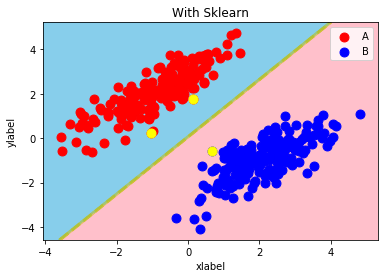

In [122]:
decision_region(X_train, y_train, svc, step=0.01, title='With Sklearn', xlabel='xlabel', ylabel='ylabel', target_names=["A" ,'B'])

In [142]:
SV = ScratchSVMClassifier(num_iter=500, lr=0.001, bias=True ,Threshold=1e-5)
SV.fit(X_train, y_train, X_test, y_test)
SV_pred = SV.predict(X_test)

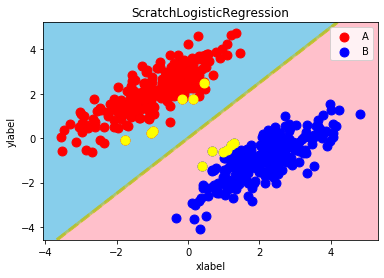

In [143]:
decision_region(X, y, SV, step=0.01, title='ScratchLogisticRegression', xlabel='xlabel', ylabel='ylabel', target_names=["A" ,'B'])